## Import libraries

In [1]:
import pandas as pd #data frames (for storing data)
import numpy as np #scientific computing
import itertools

#matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick #for percentage ticks
import scikitplot as skplt 

from sklearn import tree

from sklearn.model_selection import train_test_split #Data split function
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

from collections import Counter
#add all necessary libraries here

## Import data

In [2]:
#import the data into a Pandas dataframe and show it
data = pd.read_csv('social_stats_classification.csv')
data.head(10).style #add .style to show all columns (otherwise some columns will be hidden with "...")

In [3]:
# drop first column because its sudo primary key
data = data.iloc[:,2:]
data.head(10).style

## Data exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12648 entries, 0 to 12647
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hourly_comments              12648 non-null  int64  
 1   hourly_posts                 12648 non-null  int64  
 2   hourly_followers             12648 non-null  int64  
 3   hourly_overview_page_views   12648 non-null  int64  
 4   hourly_total_page_views      12648 non-null  int64  
 5   hourly_influence_page_views  12648 non-null  int64  
 6   hourly_twitter_following     12648 non-null  int64  
 7   hourly_fb_likes              12648 non-null  int64  
 8   hourly_trades_page_views     12648 non-null  int64  
 9   hourly_twitter_favourites    12648 non-null  int64  
 10  hourly_forum_page_views      12648 non-null  int64  
 11  hourly_twitter_lists         12648 non-null  int64  
 12  hourly_twitter_statuses      12648 non-null  int64  
 13  hourly_fb_talkin

In [5]:
data.describe().style

In [6]:
data.shape

(12648, 25)

In [7]:
data.corr().style

## Data visualization

In [9]:
# plot response
keys, counts = np.unique(data['class'], return_counts=True)
counts_norm = counts/counts.sum()

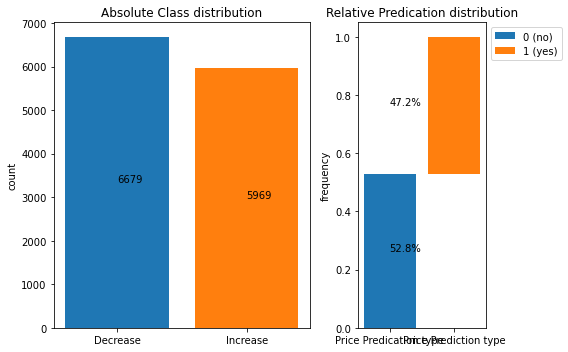

In [10]:
fig = plt.figure(figsize=(8, 5)) #specify figure size
gs = gridspec.GridSpec(1, 2, width_ratios=[2,1]) #specify relative size of left and right plot

#Absolute values
ax0 = plt.subplot(gs[0])
ax0 = plt.bar(['Decrease', 'Increase'], counts, color=['#1f77b4','#ff7f0e']) #left bar plot
ax0 = plt.title('Absolute Class distribution') 
ax0 = plt.ylabel('count')
ax0 = plt.text(keys[0], counts[0]/2, counts[0]) #add text box with count of non-fraudulent cases
ax0 = plt.text(keys[1], counts[1]/2, counts[1]) #add text box with count of fraudulent cases

#Normalized values
ax1 = plt.subplot(gs[1])
ax1 = plt.bar(['Price Predication type'], [counts_norm[0]], label='0 (no)')
ax1 = plt.bar(['Price Prediction type'], [counts_norm[1]], bottom=counts_norm[0], label='1 (yes)')
ax1 = plt.legend(bbox_to_anchor=(1, 1))
ax1 = plt.title('Relative Predication distribution')
ax1 = plt.ylabel('frequency')
ax1 = plt.text(['Price Predication type'],counts_norm[0]/2, '{}%'.format((counts_norm[0]*100).round(1)))
ax1 = plt.text(['Price Predication type'],(counts_norm[1]/2)+counts_norm[0], '{}%'.format((counts_norm[1]*100).round(1)))

plt.tight_layout()
plt.show()

## Data preprocessing

In [11]:
X, y = data.iloc[:,:-1], data['class']

In [12]:
X.head()

hourly_comments  hourly_posts  hourly_followers  \
0                9             0                 0   
1                4             1                 1   
2                0             1                 0   
3                4             1                 1   
4               10             3                 2   

   hourly_overview_page_views  hourly_total_page_views  \
0                         350                      599   
1                         290                      468   
2                         273                      475   
3                         272                      464   
4                         227                      417   

   hourly_influence_page_views  hourly_twitter_following  hourly_fb_likes  \
0                            0                         0                0   
1                            0                         0                0   
2                            2                         0                0   
3                            0                         0                0   
4                            0                         0                0   

   hourly_trades_page_views  hourly_twitter_favourites  ...  \
0                        18                          0  ...   
1                         8                          0  ...   
2                         7                          0  ...   
3                         4                          0  ...   
4                         0                          0  ...   

   hourly_twitter_followers  reddit_posts_per_hour  reddit_active_users  \
0                         0                   3.80                 4157   
1                         0                   4.12                 4266   
2                         0                   4.03                 4054   
3                         0                   3.92                 5385   
4                         0                   3.87                 4710   

   hourly_markets_page_views  hourly_analysis_page_views  \
0                          8                           0   
1                          5                           2   
2                          6                           7   
3                          2                           3   
4                          5                           6   

   hourly_charts_page_views  hourly_reddit_subscribers  \
0                       109                         81   
1                        75                         43   
2                        80                         40   
3                        80                         33   
4                        86                         16   

   reddit_comments_per_hour  reddit_posts_per_day  reddit_comments_per_day  
0                     82.15                 91.27                  1971.70  
1                    112.50                 98.82                  2700.00  
2                     94.41                 96.64                  2265.93  
3                     80.61                 94.07                  1934.62  
4                     68.17                 92.97                  1636.05  

[5 rows x 24 columns]

In [13]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [14]:
#Encode Categorical variables
# X = pd.get_dummies(X, columns=["CHK_ACCT", "HISTORY","SAV_ACCT","EMPLOYMENT","PRESENT_RESIDENT","JOB"], prefix=["CHK_ACCT", "HISTORY","SAV_ACCT","EMPLOYMENT","PRESENT_RESIDENT","JOB"]) #we add a prefix for easier identification
# X.head()

In [15]:
X.describe().style

## Data split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1234) #split data 70:30

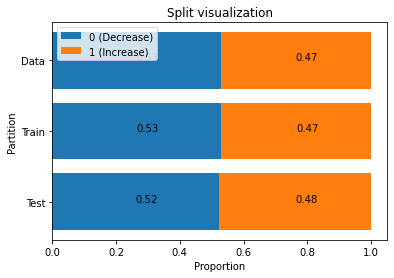

In [18]:
train_dist = y_train.value_counts() / len(y_train) #normalize absolute count values for plotting
test_dist = y_test.value_counts() / len(y_test)
data_dist = y.value_counts() / len(y)

fig, ax = plt.subplots()

ax.barh(['Test','Train','Data'], [test_dist[0], train_dist[0], data_dist[0]], color='#1f77b4', label='0 (Decrease)')
ax.barh(['Test','Train','Data'], [test_dist[1], train_dist[1], data_dist[1]], left=[test_dist[0], train_dist[0], data_dist[0]], color='#ff7f0e', label='1 (Increase)')
ax.set_title('Split visualization')
ax.legend(loc='upper left')
plt.xlabel('Proportion')
plt.ylabel('Partition')

#plot bar values
for part, a, b in zip(['Test', 'Train','Data'], [test_dist[0], train_dist[0], data_dist[0]], [test_dist[1], train_dist[1], data_dist[1]]):
    plt.text(a/2, part, str(np.round(a, 2)))
    plt.text(b/2+a, part, str(np.round(b, 2)));

## Build an (unbalanced) Decision Tree model

In [19]:
tree_imb = tree.DecisionTreeClassifier().fit(X_train, y_train)

In [20]:
y_pred_tree_imb = tree_imb.predict(X_test)
y_predProba_tree_imb = tree_imb.predict_proba(X_test)
print ("Accuracy is: ", (accuracy_score(y_test, y_pred_tree_imb)*100).round(2))

Accuracy is:  50.25


## Rebalancing with SMOTE

In [23]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, y_train) #ONLY APPLIED TO TRAINING!!!

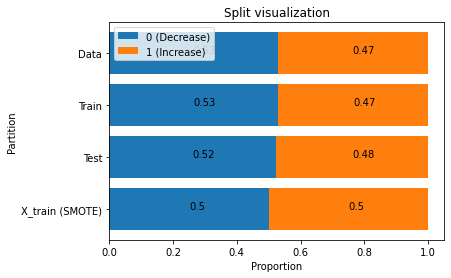

In [24]:
train_dist = y_train.value_counts() / len(y_train) #normalize absolute count values for plotting
test_dist = y_test.value_counts() / len(y_test)
data_dist = y.value_counts() / len(y)
smote_dist = pd.Series(y_sm).value_counts() / len(pd.Series(y_sm))

fig, ax = plt.subplots()

ax.barh(['X_train (SMOTE)','Test','Train','Data'], [smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], color='#1f77b4', label='0 (Decrease)')
ax.barh(['X_train (SMOTE)','Test','Train','Data'], [smote_dist[1], test_dist[1], train_dist[1], data_dist[1]], left=[smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], color='#ff7f0e', label='1 (Increase)')
ax.set_title('Split visualization')
ax.legend(loc='upper left')
plt.xlabel('Proportion')
plt.ylabel('Partition')

#plot bar values
for part, a, b in zip(['X_train (SMOTE)', 'Test', 'Train','Data'], [smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], [smote_dist[1], test_dist[1], train_dist[1], data_dist[1]]):
    plt.text(a/2, part, str(np.round(a, 2)))
    plt.text(b/2+a, part, str(np.round(b, 2)));

## Build a balanced Decision Tree model

In [25]:
tree_bal = tree.DecisionTreeClassifier().fit(X_sm, y_sm)

In [26]:
y_pred_tree_bal = tree_bal.predict(X_test)
y_predProba_tree_bal = tree_bal.predict_proba(X_test)
print ("Accuracy is: ", (accuracy_score(y_test, y_pred_tree_bal)*100).round(2))

Accuracy is:  51.09


## Model evaluation

### 1. Confusion Matrix
### 2. ROC and AUC
### 3. Expected value framework (Excel)

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylim([1.5, -0.5]) #added to fix a bug that causes the matrix to be squished
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

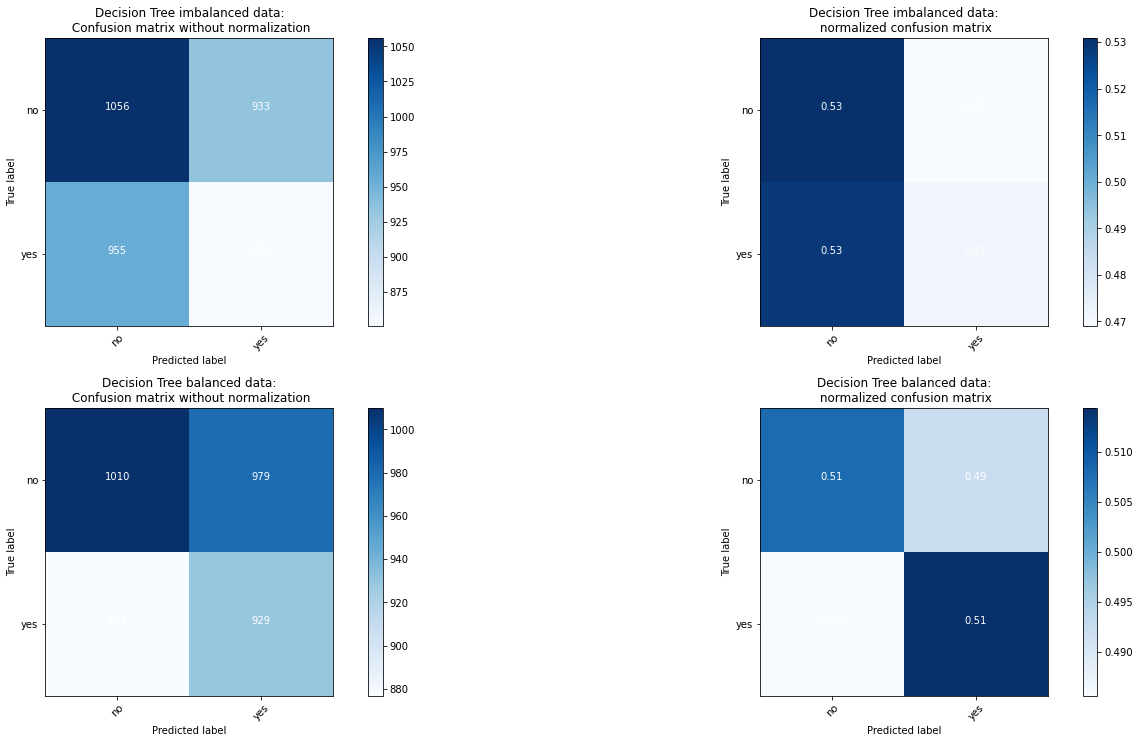

In [28]:
# Compute confusion matrix
class_names = ['no', 'yes']
cnf_matrix_tree_imb = confusion_matrix(y_test, y_pred_tree_imb)
cnf_matrix_tree_bal = confusion_matrix(y_test, y_pred_tree_bal)

np.set_printoptions(precision=2)

plt.figure(figsize=(20, 15))

#Plot Decision Tree (imbalanced) confusion matrix
plt.subplot(321) 
plot_confusion_matrix(cnf_matrix_tree_imb, classes=class_names,
                      title='Decision Tree imbalanced data:\n Confusion matrix without normalization')

#Plot Decision Tree (imbalanced) normalized confusion matrix
plt.subplot(322) 
plot_confusion_matrix(cnf_matrix_tree_imb, classes=class_names, normalize=True,
                      title='Decision Tree imbalanced data:\n normalized confusion matrix')


#Plot Decision Tree (balanced) confusion matrix
plt.subplot(323) 
plot_confusion_matrix(cnf_matrix_tree_bal, classes=class_names,
                      title='Decision Tree balanced data:\n Confusion matrix without normalization')

#Plot Decision Tree (balanced) normalized onfusion matrix
plt.subplot(324) 
plot_confusion_matrix(cnf_matrix_tree_bal, classes=class_names, normalize=True,
                      title='Decision Tree balanced data:\n normalized confusion matrix')

plt.show()

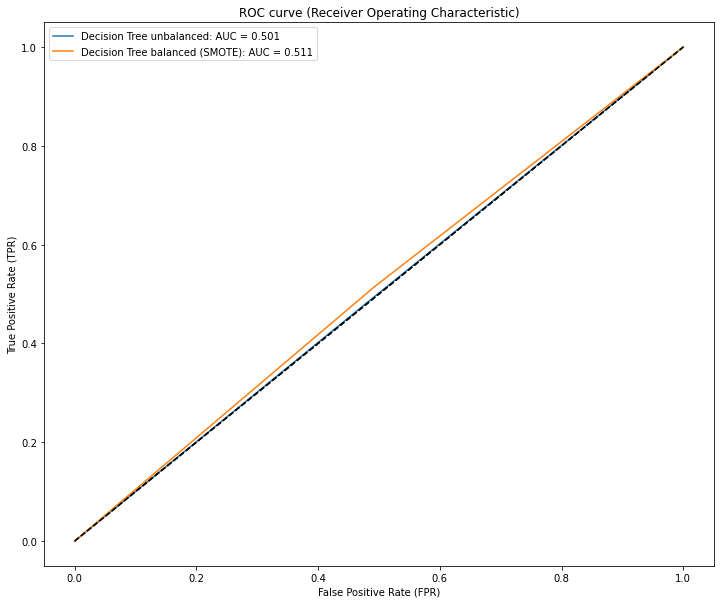

In [29]:
plt.figure(figsize=(12,10))

for test, pred, name in zip([y_test, y_test], [y_predProba_tree_imb[:,1], y_predProba_tree_bal[:,1]], ['Decision Tree unbalanced','Decision Tree balanced (SMOTE)']):
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{}: AUC = {}'.format(name, round(roc_auc, 3)))
    plt.legend(loc='best')
    plt.plot([0,1],[0,1],color='black', linestyle='--')

plt.title('ROC curve (Receiver Operating Characteristic)')    
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')

plt.show()